### Setup Environment:

In [1]:
from src.data_analysis import show_random_images, show_missing, plot_categorical_columns, plot_continuous, get_image_statistics_df, plot_image_statistics, calculate_normalization_values
from src.get_dataset import get_dataset
from ydata_profiling import ProfileReport

import os

In [2]:
# Constants:
DATASET = 'data/'
DOWNLOAD = False

## Metadata:

#### Read csv file:

In [3]:
df = get_dataset("data/", download=DOWNLOAD, info=True)

loading csv file in data//labels.csv
Number of Rows: 16266
Number of Columns: 34
Column Names: image_id, patient_id, camera, patient_age, comorbidities, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, nationality, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, focus, iluminaton, image_field, artifacts, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc, other, quality

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_id                  16266 non-null  object 
 1   patient_id                16266 non-null  int64  
 2   camera                    16266 non-null  object 
 3   patient_age               10821 non-null  float64
 4   comorbidities             8030 non-null  

In [4]:
df.head()

image_id  patient_id    camera  patient_age comorbidities diabetes_time_y  \
0  img00001           1  Canon CR         48.0     diabetes1              12   
1  img00002           1  Canon CR         48.0     diabetes1              12   
2  img00003           2  Canon CR         18.0     diabetes1               7   
3  img00004           2  Canon CR         18.0     diabetes1               7   
4  img00005           3  Canon CR         22.0     diabetes1              11   

  insuline  patient_sex  exam_eye diabetes  ... vascular_occlusion  \
0      yes            1         1      yes  ...                  0   
1      yes            1         2      yes  ...                  0   
2      yes            2         1      yes  ...                  0   
3      yes            2         2      yes  ...                  0   
4      yes            1         1      yes  ...                  0   

  hypertensive_retinopathy  drusens  hemorrhage  retinal_detachment  \
0                        0        0           0                   0   
1                        0        0           0                   0   
2                        0        0           0                   0   
3                        0        0           0                   0   
4                        0        0           0                   0   

   myopic_fundus  increased_cup_disc  other   quality  normality  
0              0                   1      0  Adequate   abnormal  
1              0                   1      0  Adequate   abnormal  
2              0                   0      0  Adequate     normal  
3              0                   0      0  Adequate     normal  
4              0                   0      0  Adequate     normal  

[5 rows x 35 columns]

#### Missing Values

4 columns with missing values detected:
patient_age 33.47 % missing values
comorbidities 50.629999999999995 % missing values
diabetes_time_y 88.26 % missing values
insuline 89.46 % missing values


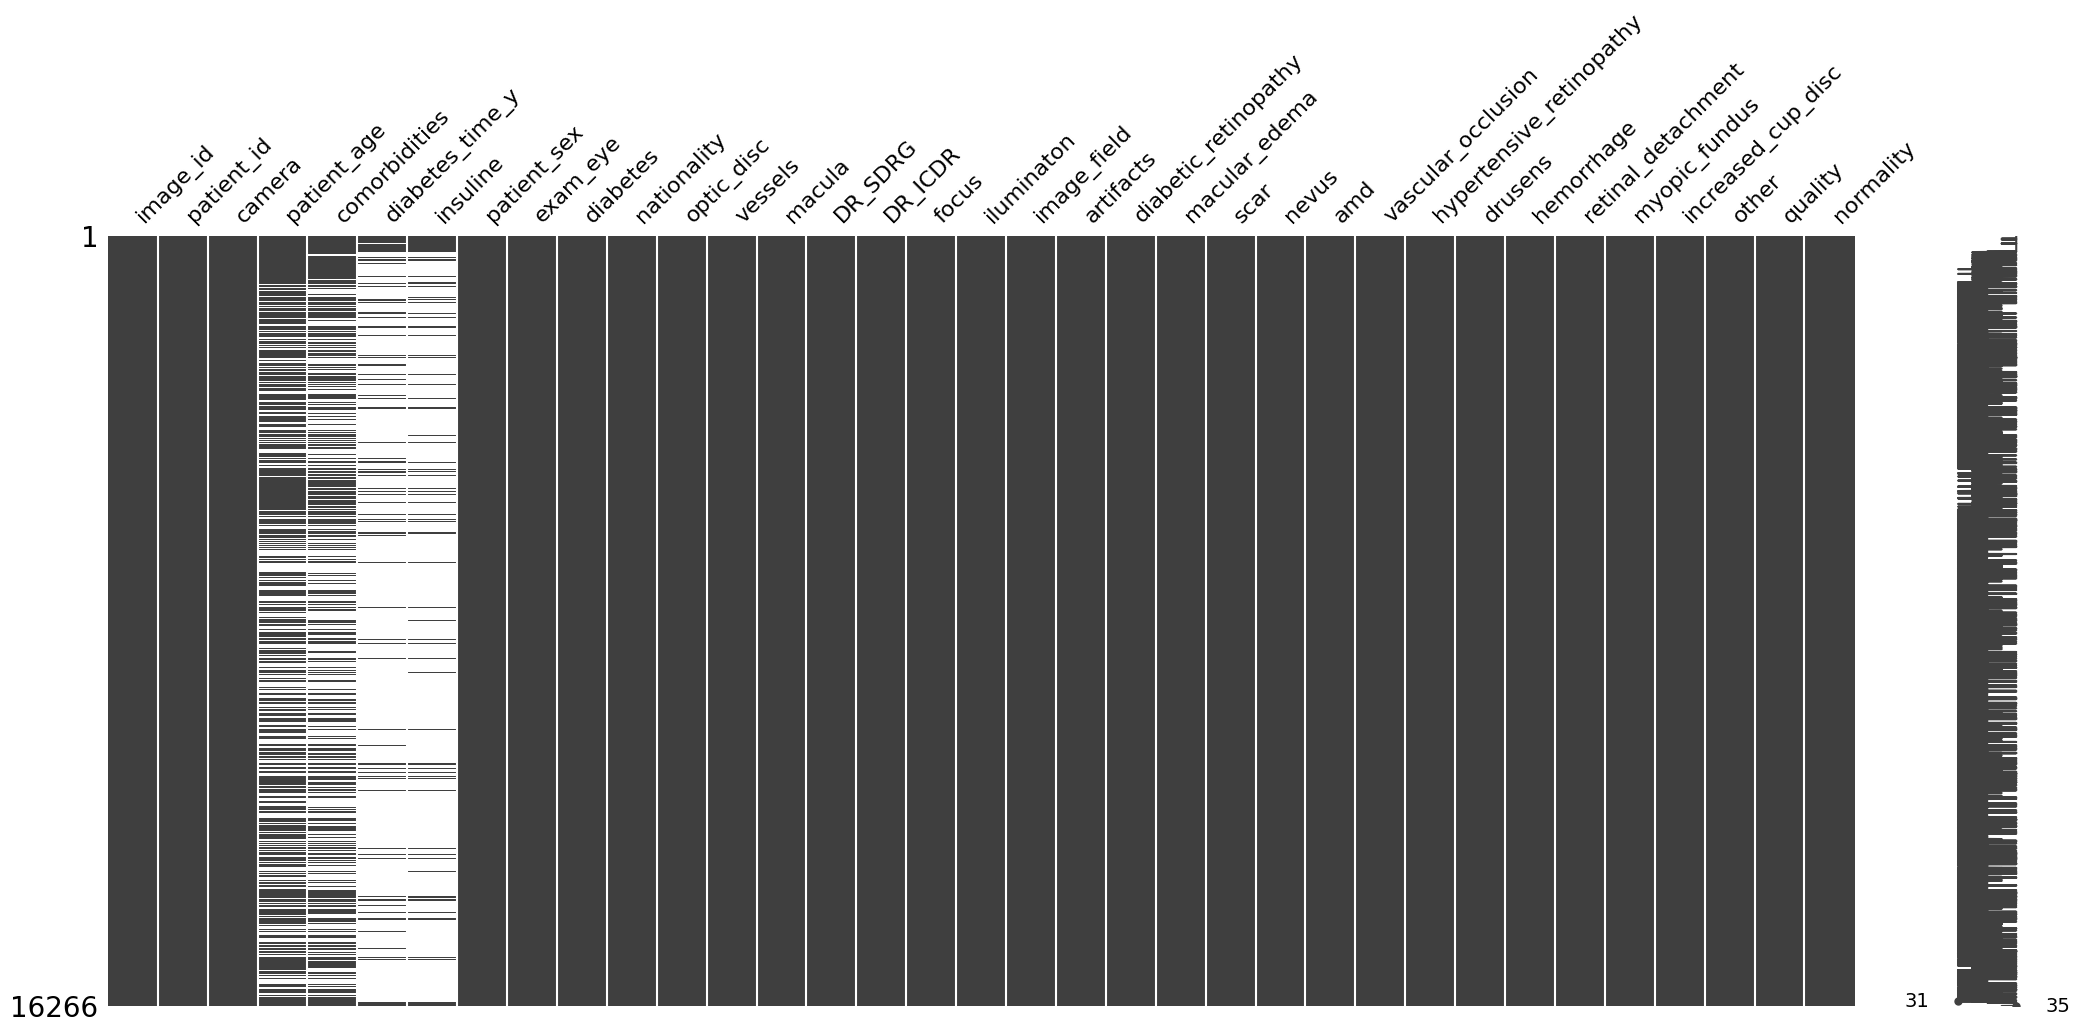

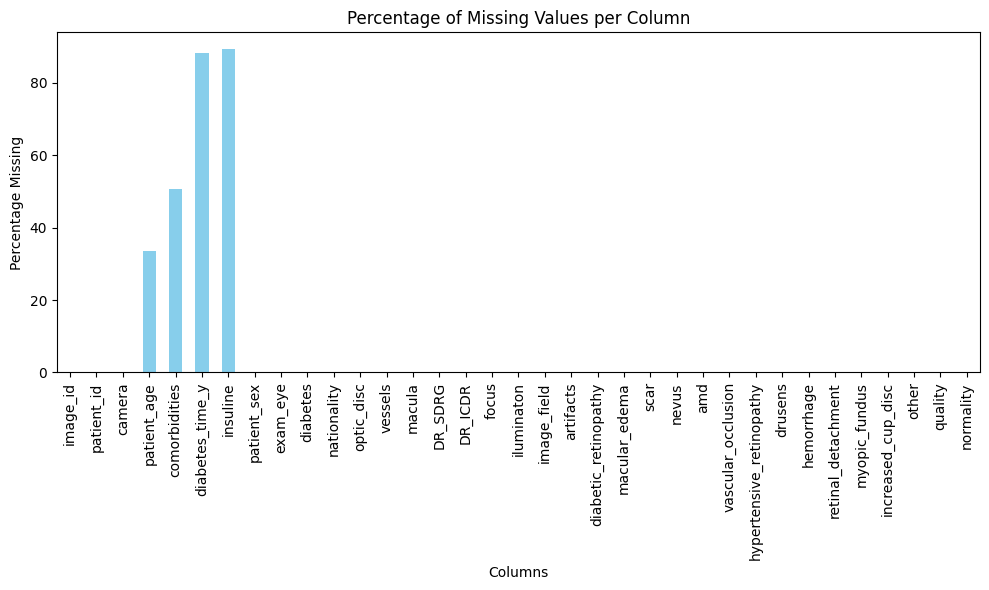

In [5]:
show_missing(df)

#### Duplicate rows

In [6]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


#### Numeric Data

##########################################################################################
########################################  Age  ########################################
##########################################################################################
count    10821.000000
mean        57.655947
std         18.260156
min          5.000000
25%         47.000000
50%         61.000000
75%         71.000000
max         97.000000
Name: patient_age, dtype: float64



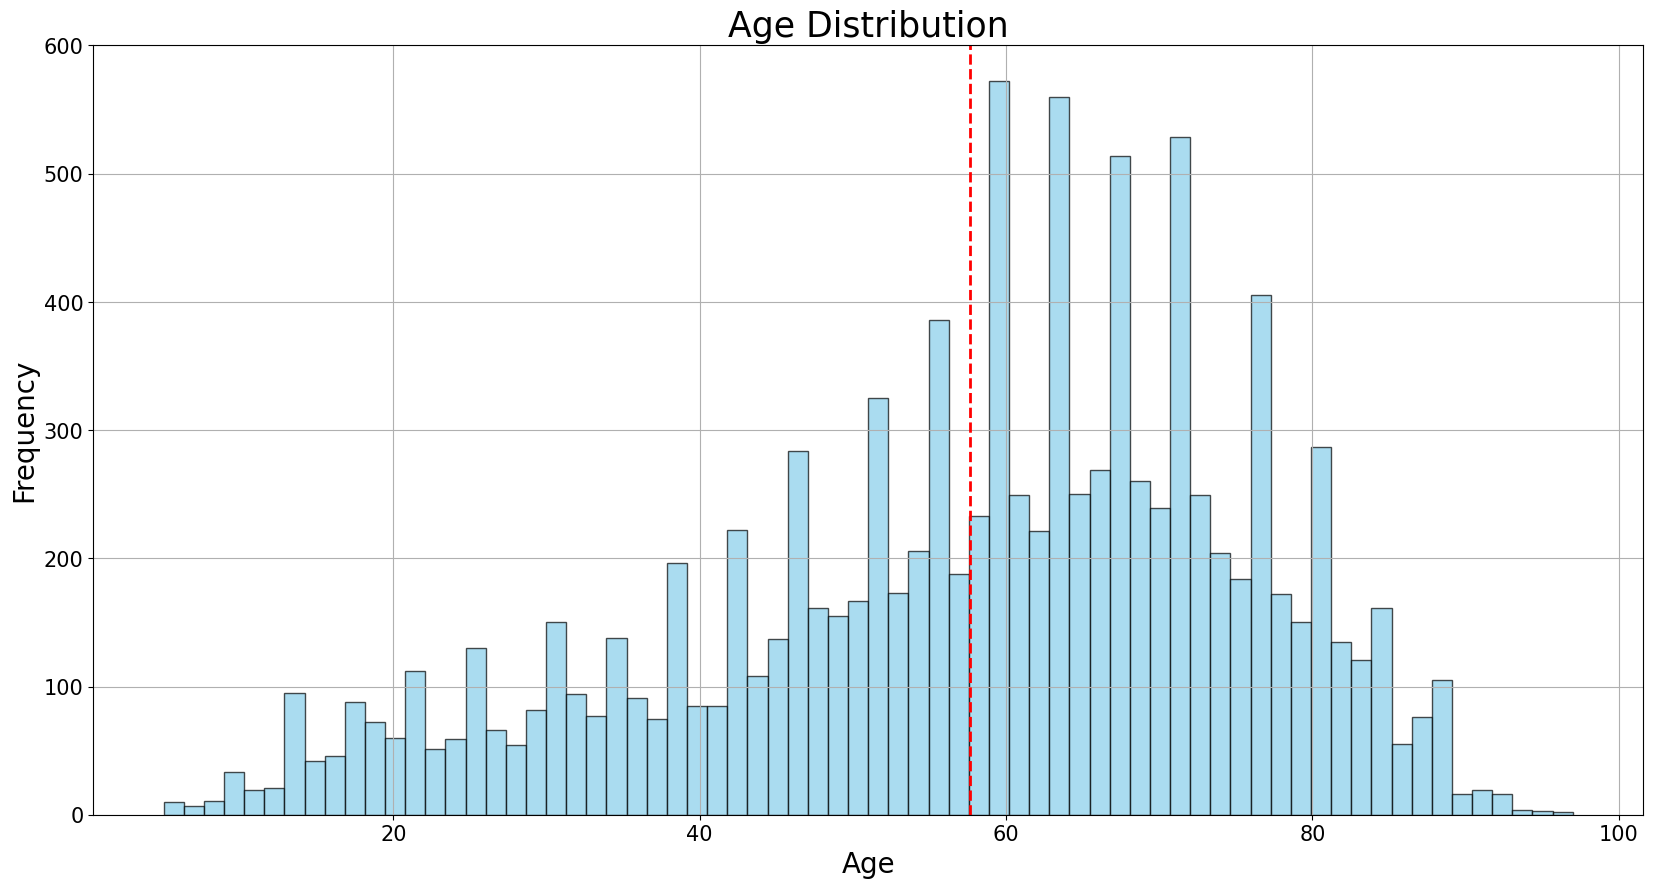

In [7]:
plot_continuous(df, 'patient_age')

### Categorical columns distributions

In [40]:
# Explore unique values in categorical columns
#N = 10
#plot_categorical_columns(df, n=N)

##########################################################################################
########################################  patient_sex  ########################################
##########################################################################################
patient_sex
Female    0.617976
Male      0.382024
Name: proportion, dtype: float64



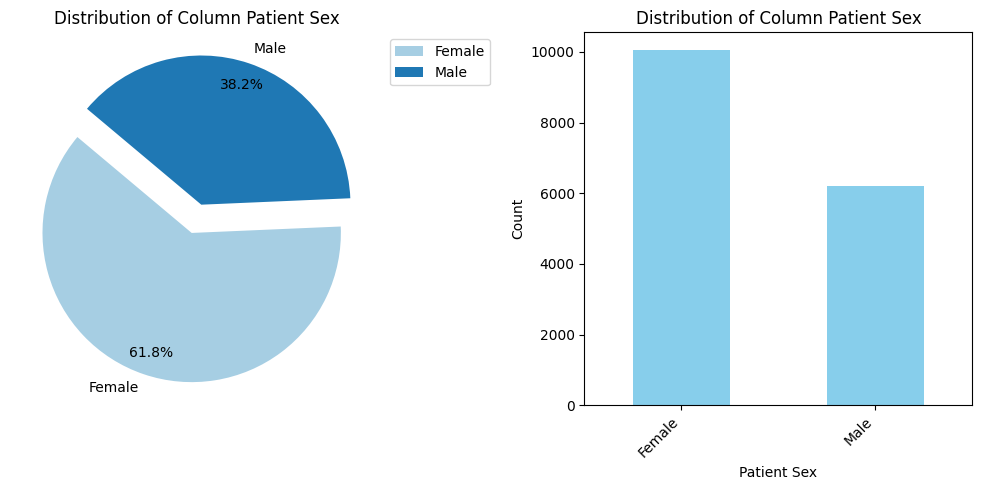

In [41]:
categorical_columns = ['patient_sex']
df['patient_sex'] = df['patient_sex'].replace({1: 'Male', 2: 'Female'})
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

#### Image quality

##########################################################################################
########################################  focus  ########################################
##########################################################################################
focus
1    0.966679
2    0.033321
Name: proportion, dtype: float64



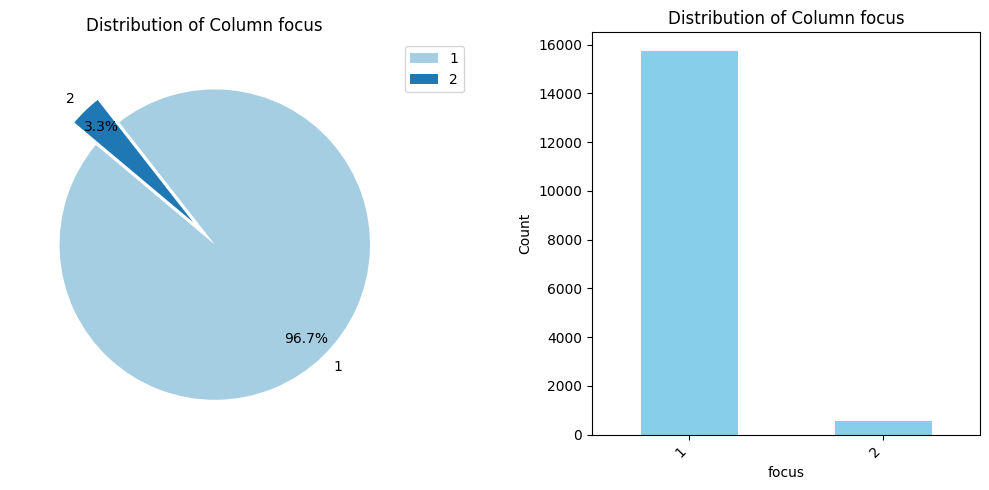

##########################################################################################
########################################  iluminaton  ########################################
##########################################################################################
iluminaton
1    0.994836
2    0.005164
Name: proportion, dtype: float64



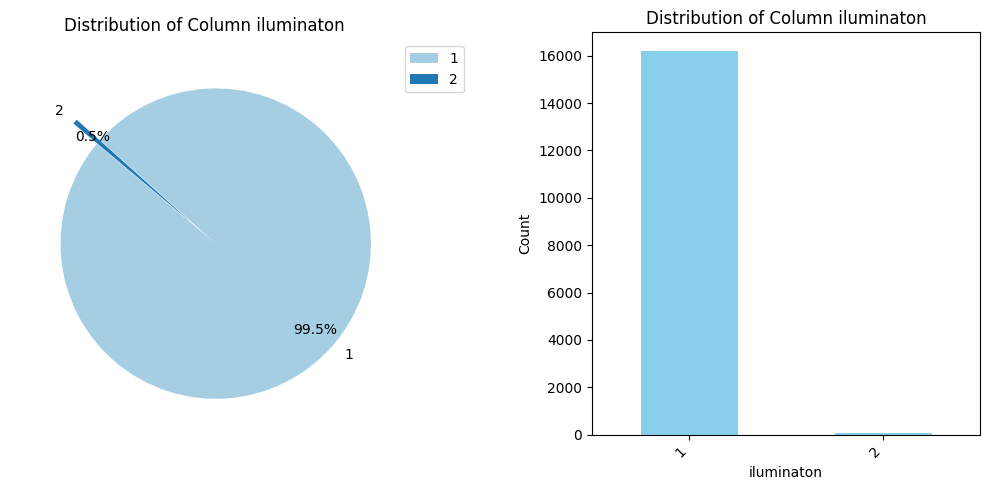

##########################################################################################
########################################  image_field  ########################################
##########################################################################################
image_field
1    0.913869
2    0.086131
Name: proportion, dtype: float64



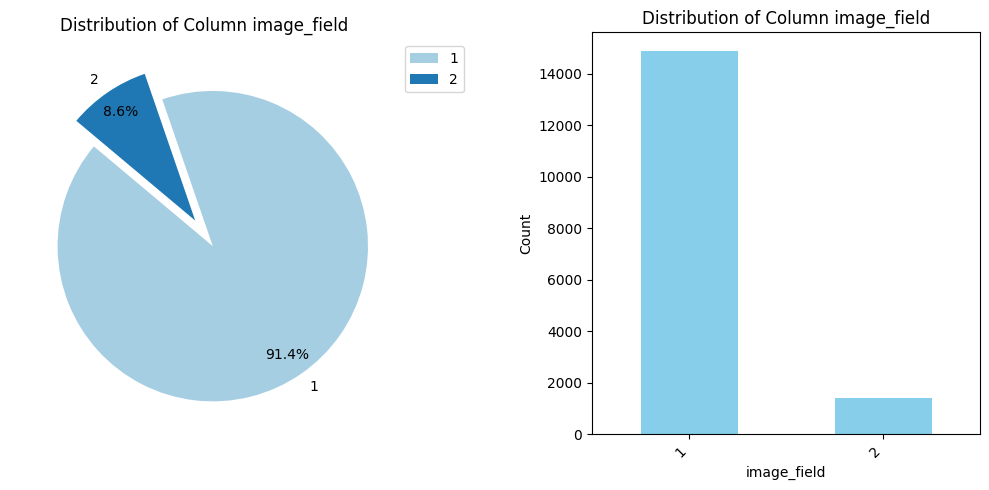

##########################################################################################
########################################  artifacts  ########################################
##########################################################################################
artifacts
1    0.996496
2    0.003504
Name: proportion, dtype: float64



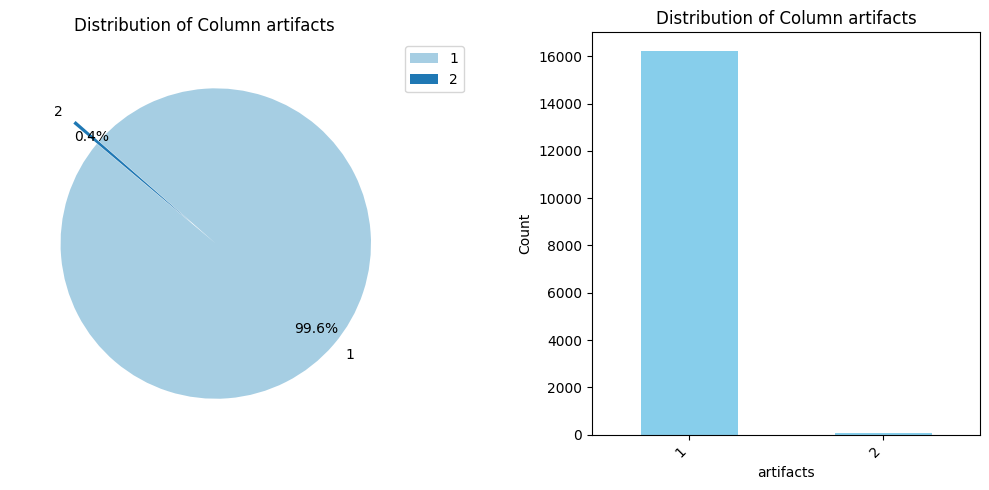

In [42]:
categorical_columns = ['focus', 'iluminaton', 'image_field', 'artifacts']
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

#### Anatomical parameters

##########################################################################################
########################################  optic_disc  ########################################
##########################################################################################
optic_disc
1     0.798229
2     0.201709
bv    0.000061
Name: proportion, dtype: float64



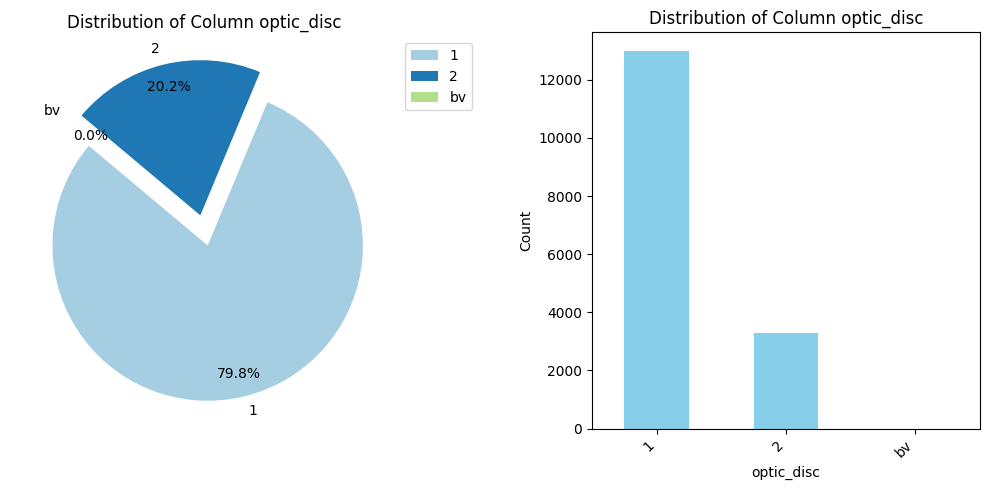

##########################################################################################
########################################  vessels  ########################################
##########################################################################################
vessels
1    0.950387
2    0.049613
Name: proportion, dtype: float64



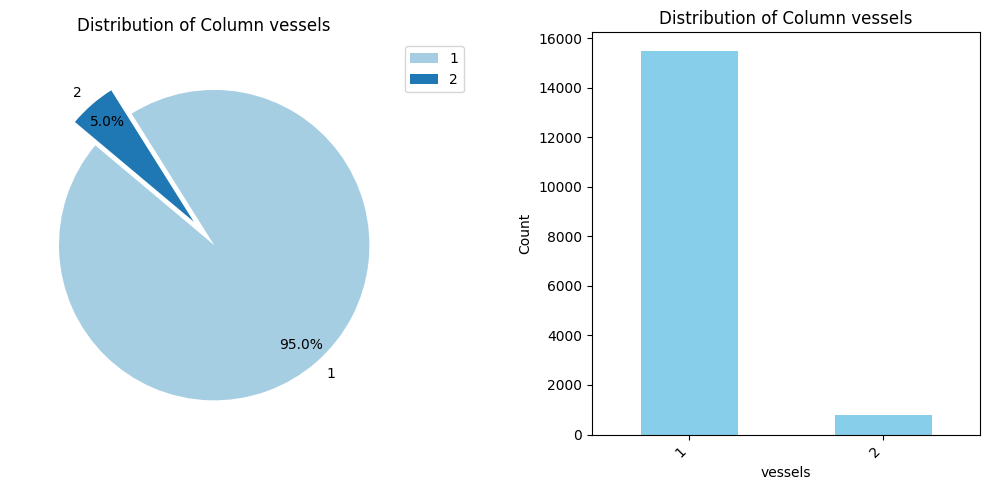

##########################################################################################
########################################  macula  ########################################
##########################################################################################
macula
1    0.711976
2    0.288024
Name: proportion, dtype: float64



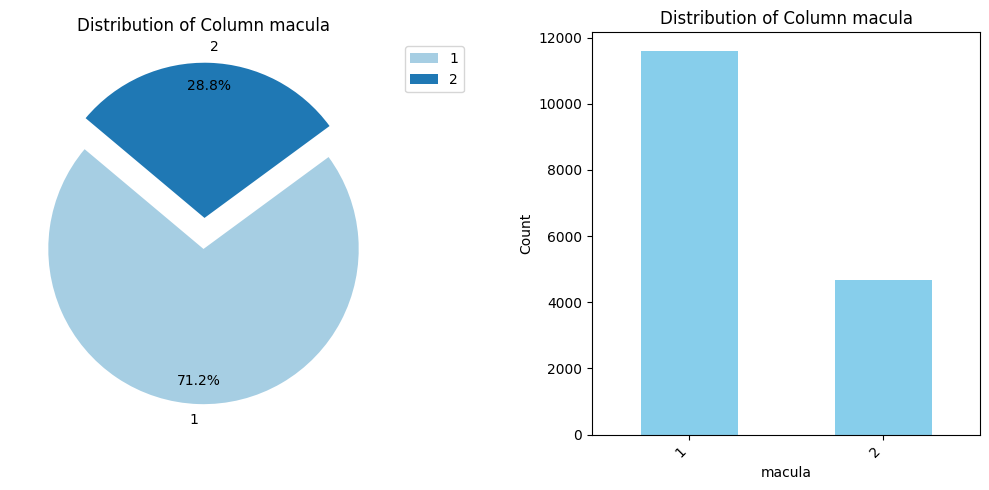

In [43]:
categorical_columns = ['optic_disc', 'vessels', 'macula']
plot_categorical_columns(df, categorical_columns=categorical_columns)

#### Diagnoses

##########################################################################################
########################################  diabetic_retinopathy  ########################################
##########################################################################################
diabetic_retinopathy
0    0.935694
1    0.064306
Name: proportion, dtype: float64



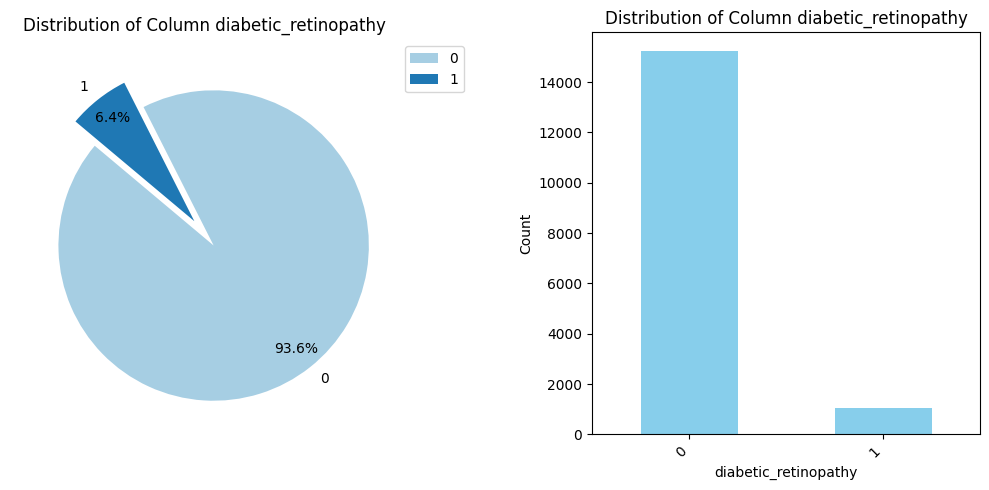

##########################################################################################
########################################  macular_edema  ########################################
##########################################################################################
macular_edema
0    0.975286
1    0.024714
Name: proportion, dtype: float64



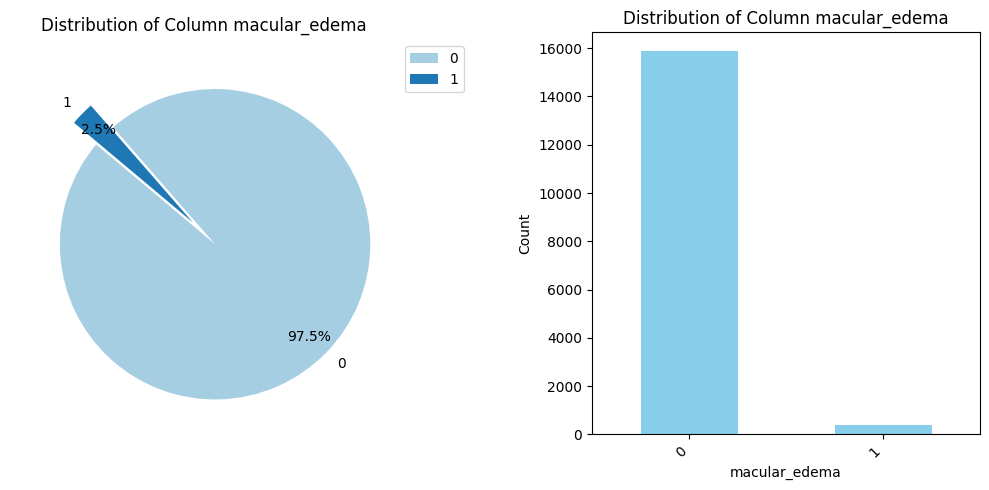

##########################################################################################
########################################  scar  ########################################
##########################################################################################
scar
0    0.982171
1    0.017829
Name: proportion, dtype: float64



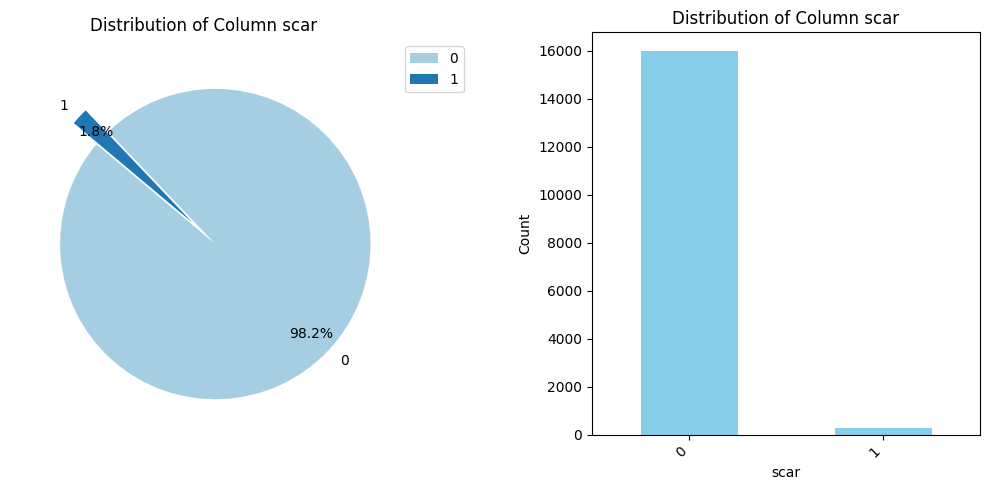

##########################################################################################
########################################  nevus  ########################################
##########################################################################################
nevus
0    0.991762
1    0.008238
Name: proportion, dtype: float64



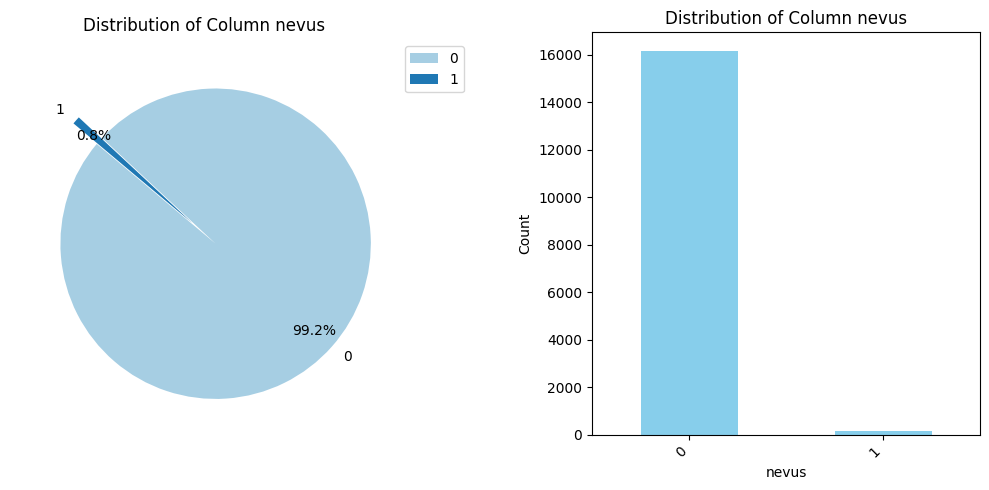

##########################################################################################
########################################  amd  ########################################
##########################################################################################
amd
0    0.977499
1    0.022501
Name: proportion, dtype: float64



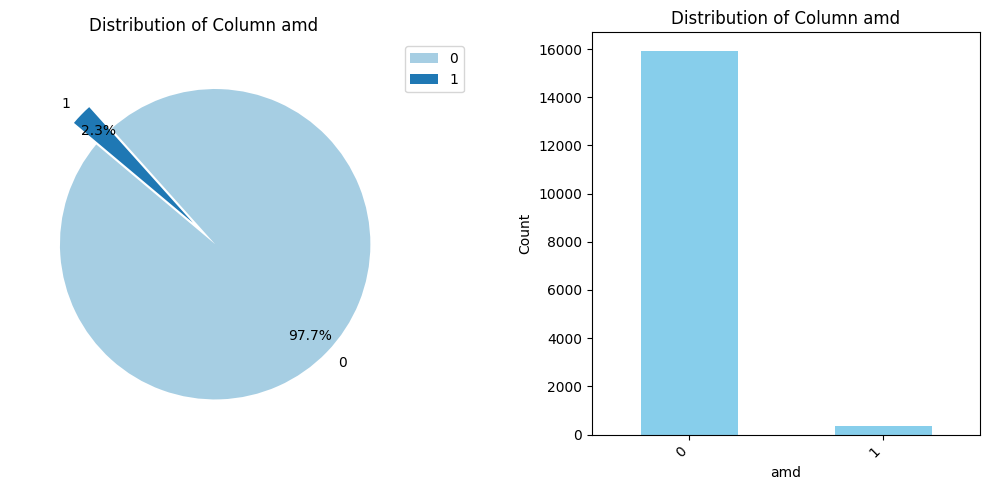

##########################################################################################
########################################  vascular_occlusion  ########################################
##########################################################################################
vascular_occlusion
0    0.993668
1    0.006332
Name: proportion, dtype: float64



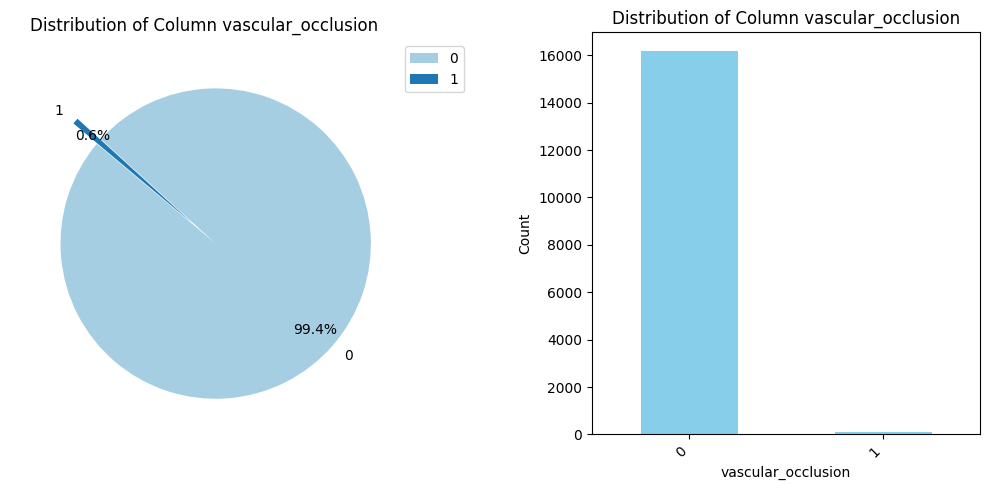

##########################################################################################
########################################  hypertensive_retinopathy  ########################################
##########################################################################################
hypertensive_retinopathy
0    0.982602
1    0.017398
Name: proportion, dtype: float64



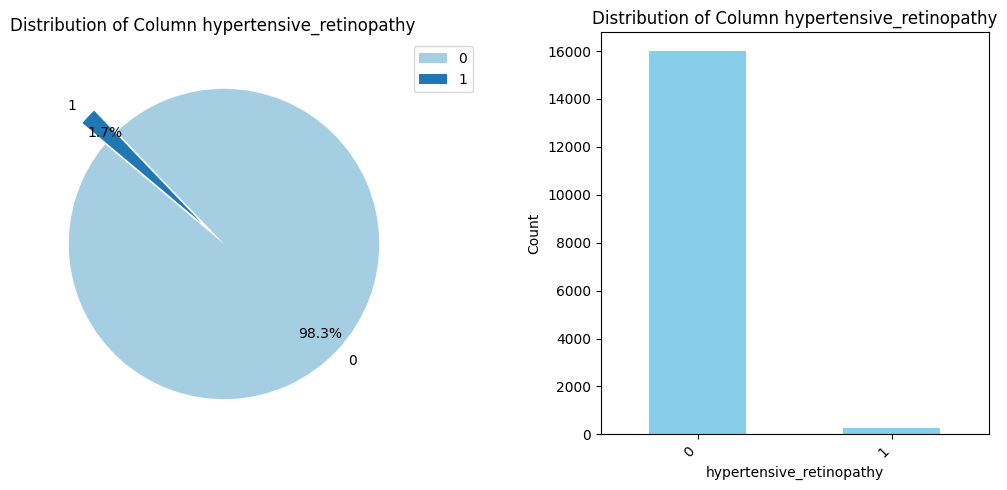

##########################################################################################
########################################  drusens  ########################################
##########################################################################################
drusens
0    0.827431
1    0.172569
Name: proportion, dtype: float64



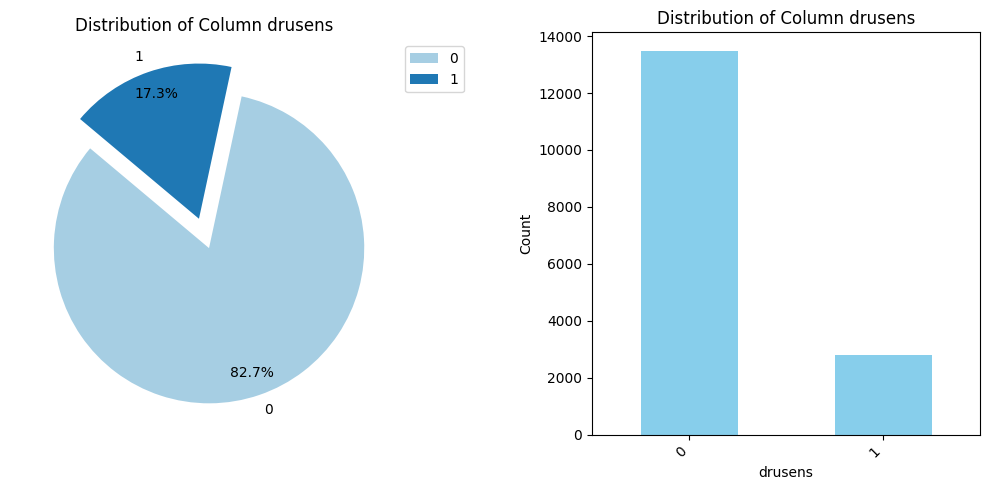

##########################################################################################
########################################  hemorrhage  ########################################
##########################################################################################
hemorrhage
0    0.994098
1    0.005902
Name: proportion, dtype: float64



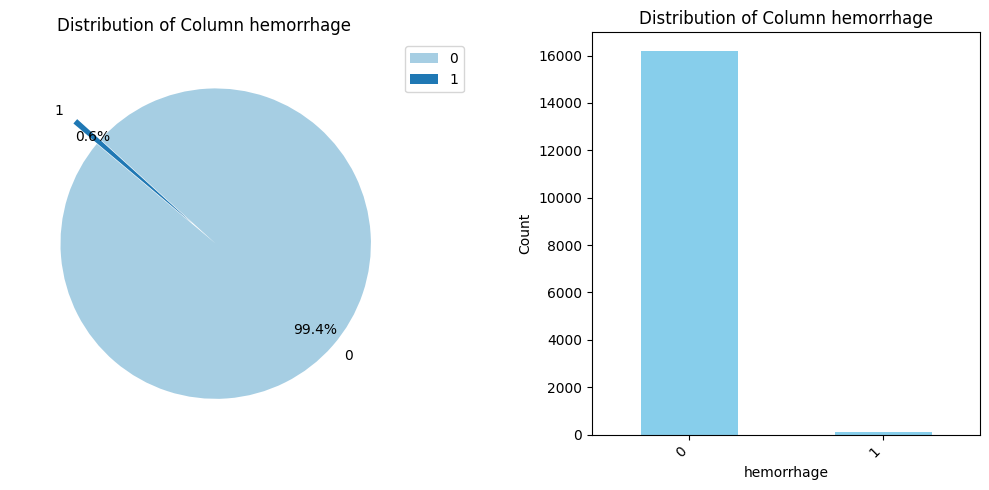

##########################################################################################
########################################  retinal_detachment  ########################################
##########################################################################################
retinal_detachment
0    0.99957
1    0.00043
Name: proportion, dtype: float64



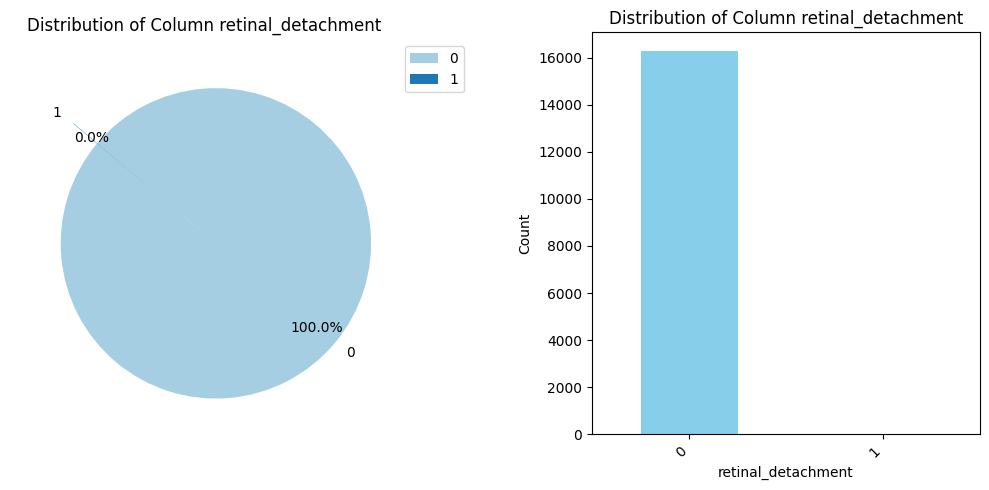

##########################################################################################
########################################  myopic_fundus  ########################################
##########################################################################################
myopic_fundus
0    0.983524
1    0.016476
Name: proportion, dtype: float64



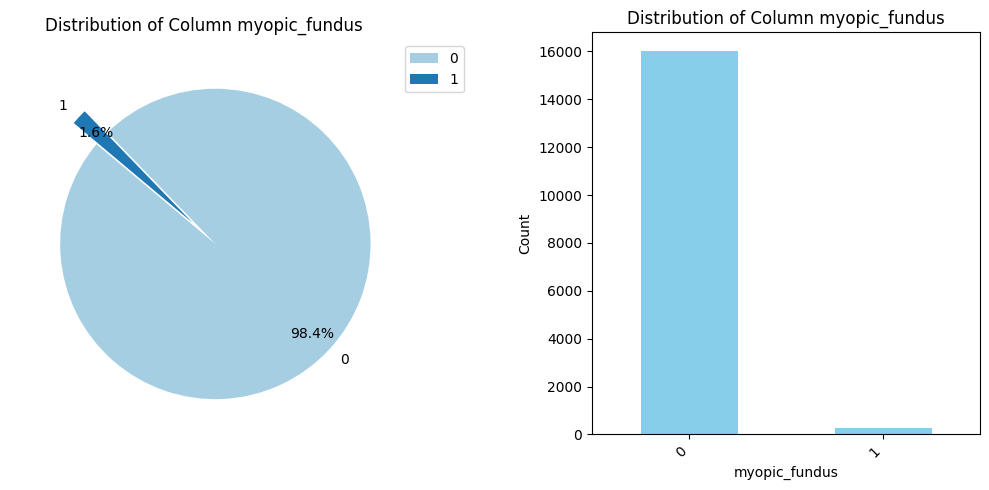

##########################################################################################
########################################  increased_cup_disc  ########################################
##########################################################################################
increased_cup_disc
0    0.803148
1    0.196852
Name: proportion, dtype: float64



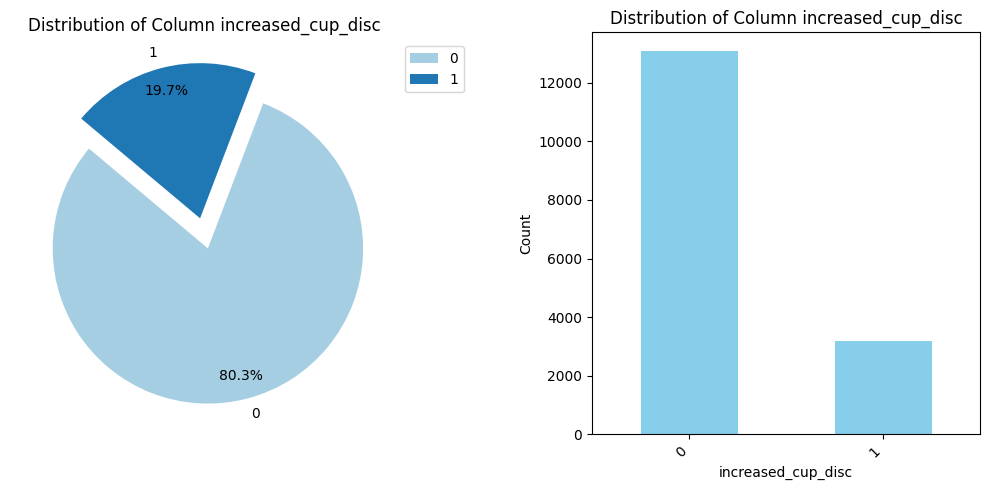

##########################################################################################
########################################  other  ########################################
##########################################################################################
other
0    0.9534
1    0.0466
Name: proportion, dtype: float64



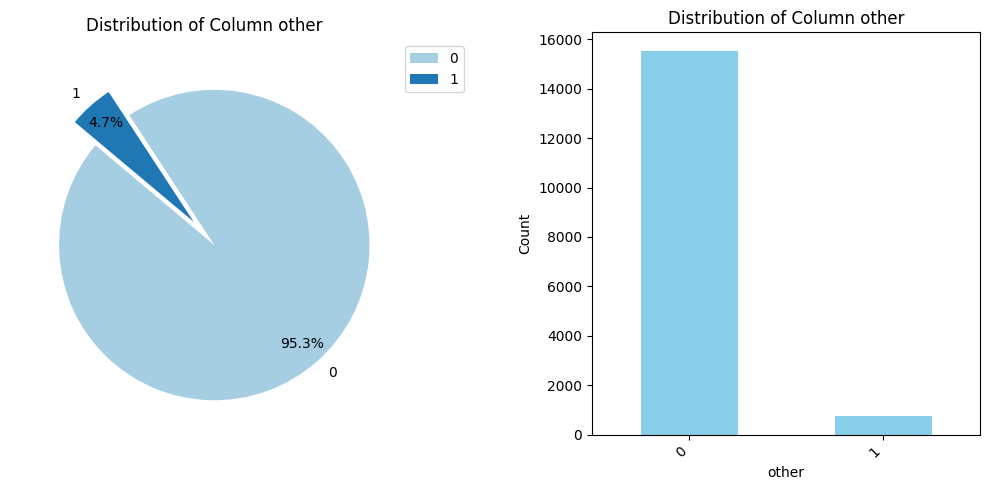

In [44]:
# Diagnoses
categorical_columns = [col for col in df.columns[20:33]]

plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

##########################################################################################
########################################  normality  ########################################
##########################################################################################
normality
normal      0.520103
abnormal    0.479897
Name: proportion, dtype: float64



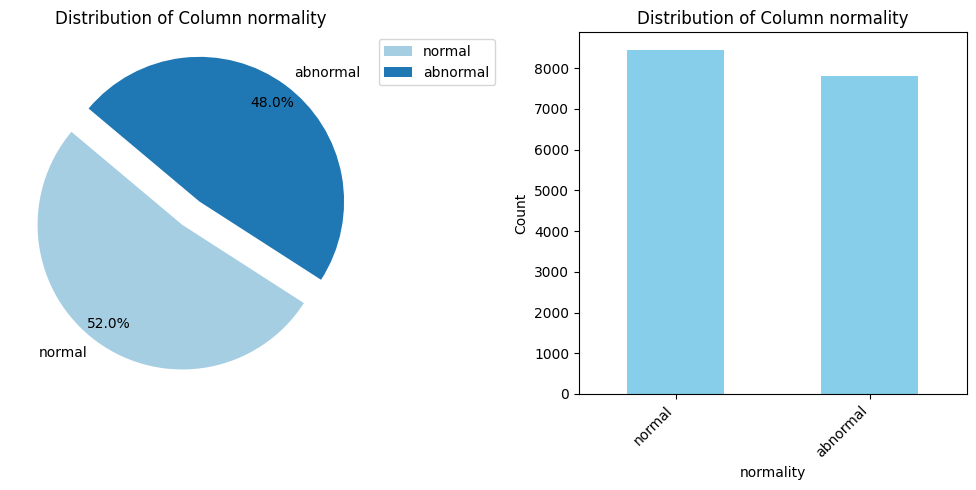

In [45]:
# Normal patients according to pathological classification
plot_categorical_columns(df, categorical_columns=['normality'])

##########################################################################################
########################################  DR_SDRG  ########################################
##########################################################################################
DR_SDRG
0    0.935202
4    0.024345
3    0.018197
1    0.015615
2    0.006640
Name: proportion, dtype: float64



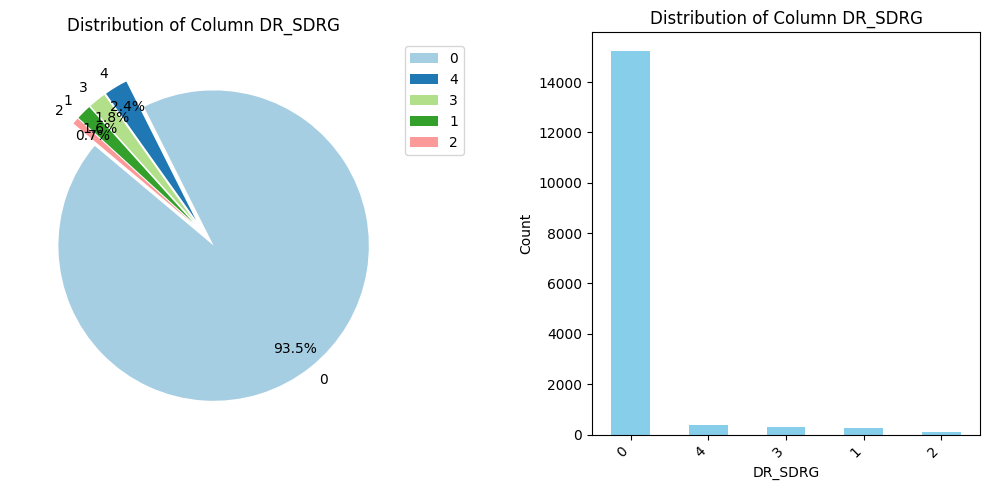

##########################################################################################
########################################  DR_ICDR  ########################################
##########################################################################################
DR_ICDR
0    0.935079
4    0.024222
2    0.019058
3    0.011681
1    0.009959
Name: proportion, dtype: float64



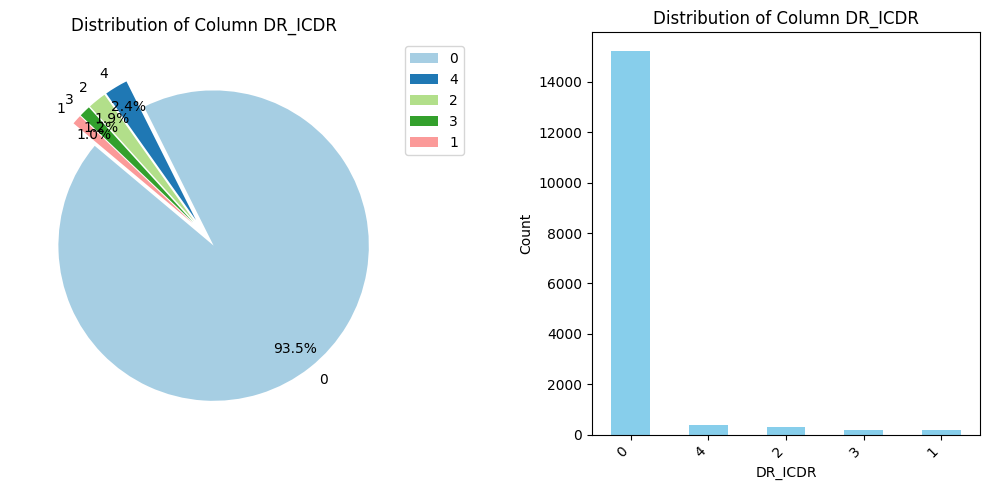

In [46]:
# Quality Parameters
categorical_columns = [col for col in df.columns[14:16]]
plot_categorical_columns(df, categorical_columns=categorical_columns)

### Create the variable referable DR

In [8]:
df['referable_dr'] = df.apply(lambda row: 'yes' if (row['DR_ICDR'] > 1 or (row['macular_edema'] == 1)) else 'no', axis=1)

##########################################################################################
########################################  referable_dr  ########################################
##########################################################################################
referable_dr
no     0.941473
yes    0.058527
Name: proportion, dtype: float64



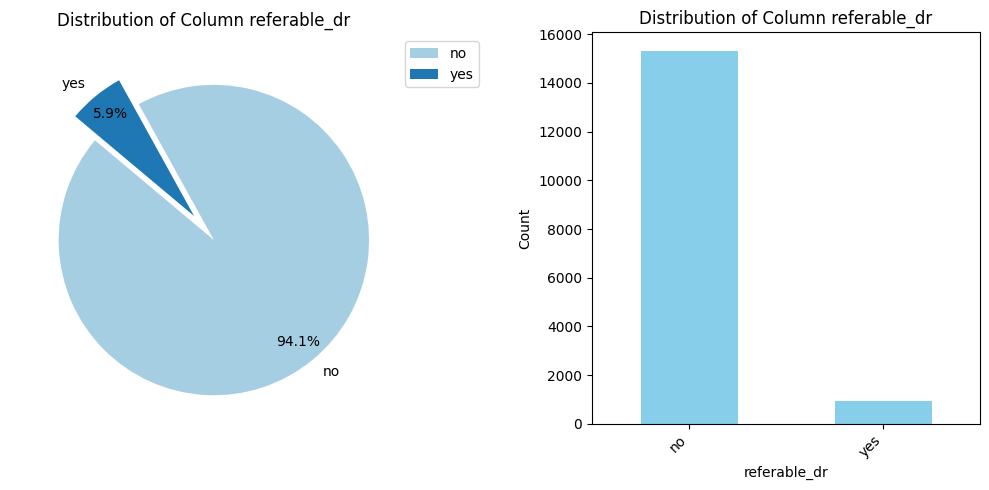

In [9]:
categorical_columns = ['referable_dr']
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

### Diabetes patients

In [10]:
diabeticos = df.loc[(df['diabetes'] =='yes')]

##########################################################################################
########################################  Age  ########################################
##########################################################################################
count    2579.000000
mean       59.330748
std        19.189521
min        10.000000
25%        51.000000
50%        64.000000
75%        73.000000
max        92.000000
Name: patient_age, dtype: float64



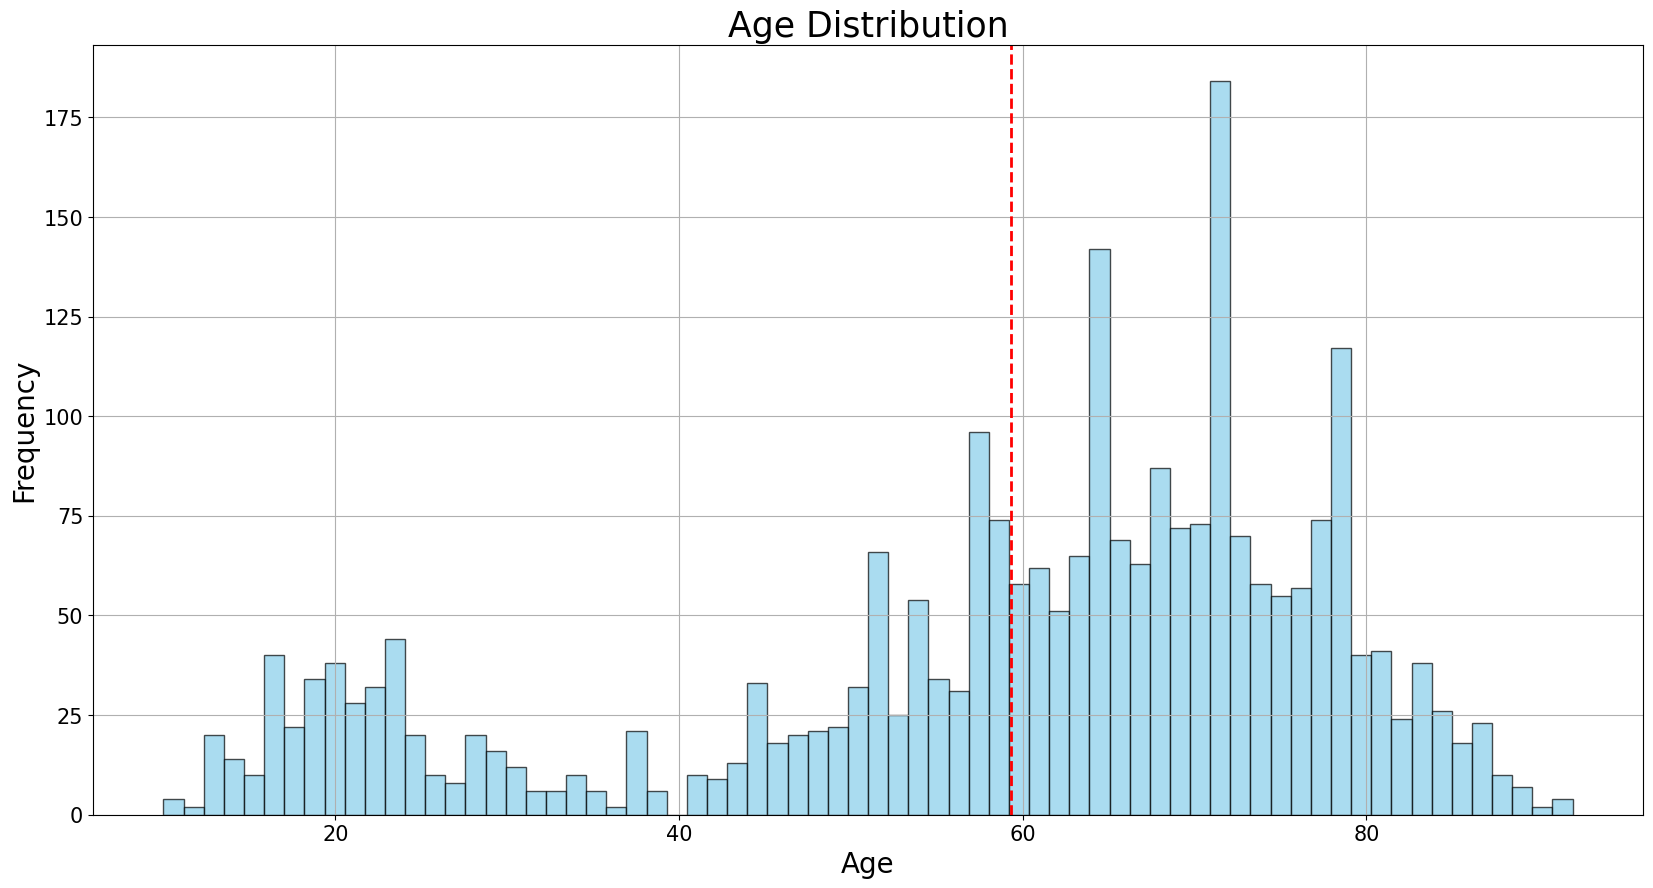

In [11]:
plot_continuous(diabeticos, 'patient_age')

##########################################################################################
########################################  DR_SDRG  ########################################
##########################################################################################
DR_SDRG
0    0.745250
4    0.094998
3    0.073672
1    0.063978
2    0.022102
Name: proportion, dtype: float64



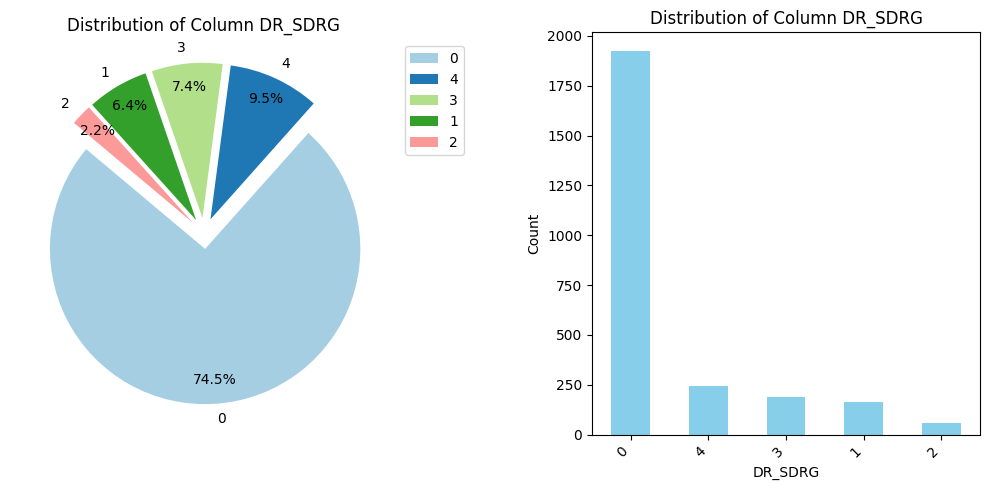

##########################################################################################
########################################  DR_ICDR  ########################################
##########################################################################################
DR_ICDR
0    0.745250
4    0.093835
2    0.070182
3    0.049244
1    0.041489
Name: proportion, dtype: float64



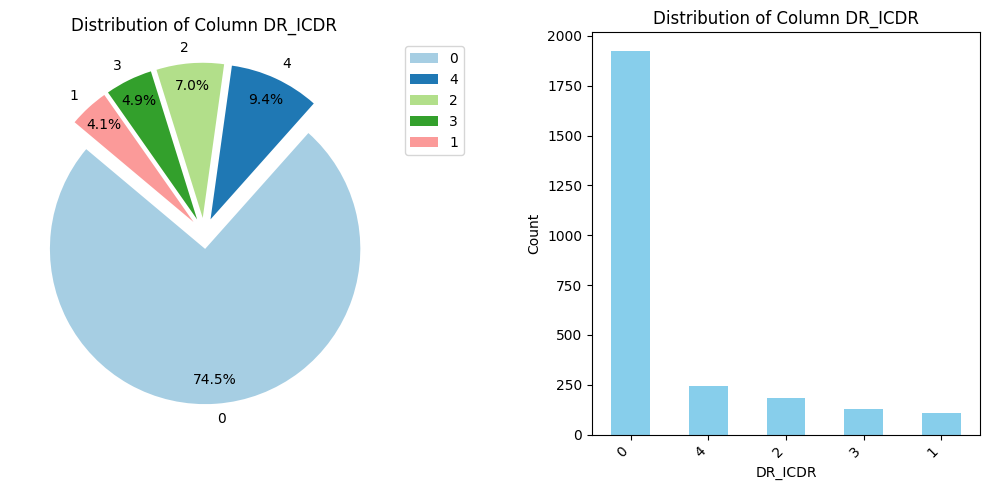

In [12]:
# Quality Parameters
categorical_columns = [col for col in diabeticos.columns[14:16]]
plot_categorical_columns(diabeticos, categorical_columns=categorical_columns)

## Images

### Show examples in different classifications

loading csv file in data/labels.csv


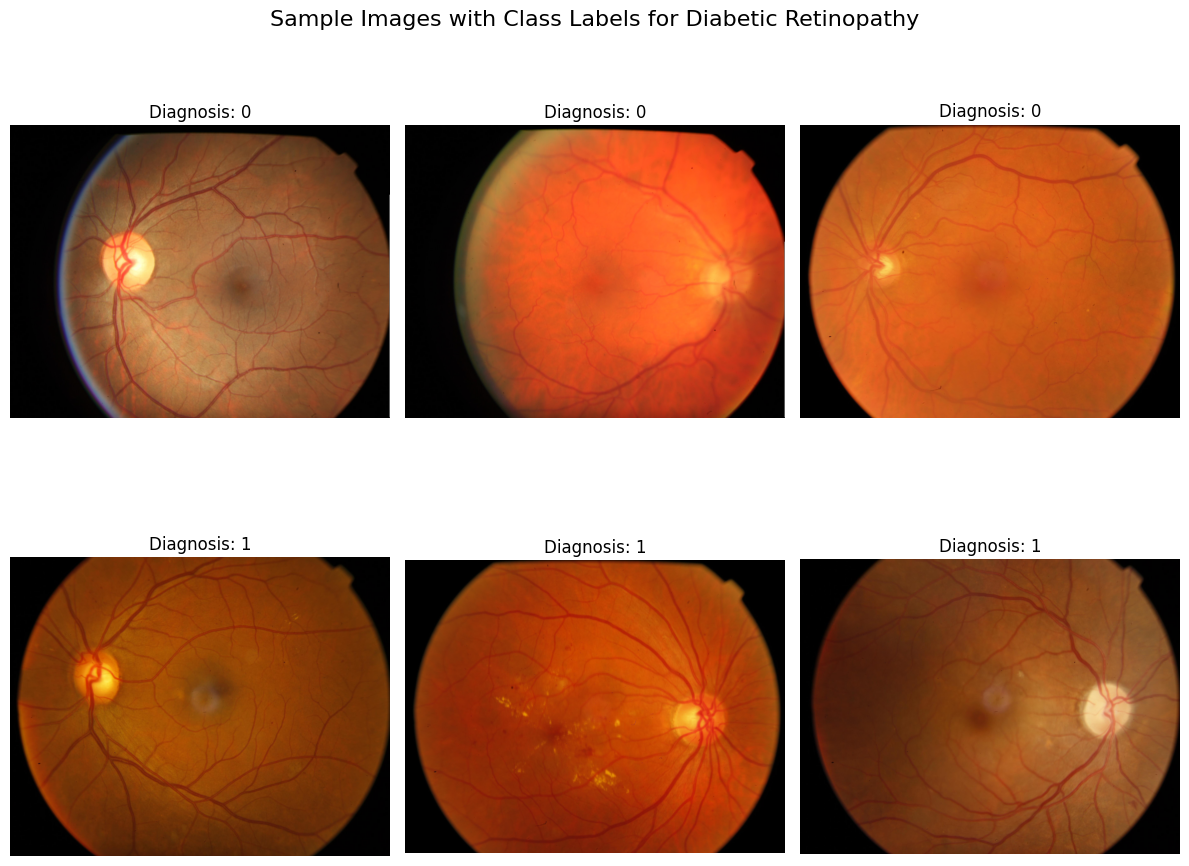

In [14]:
dataset_dir = 'data'
image_folder = '/home/opc/Retina/BRSET/images/'
id_column = 'image_id'
class_column = 'diabetic_retinopathy'
max_images_per_class = 3

show_random_images(dataset_dir, image_folder, id_column, class_column, max_images_per_class)

#### Images EDA

In [ ]:
image_directory = os.path.join(dataset_dir, image_folder)
image_stats_df = get_image_statistics_df(image_directory)

Image #0...
Image #1000...
Image #2000...
Image #3000...
Image #4000...
Image #5000...
Image #6000...
Image #7000...
Image #8000...
Image #9000...
Image #10000...
Image #11000...
Image #12000...
Image #13000...
Image #14000...
Image #15000...
Image #16000...


Statistics: 
             Height         Width        Mean_R        Mean_G        Mean_B
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000
mean    2043.989672   2634.300934     28.249296     76.226247    150.371712
std      251.761053    355.124847     15.894834     20.687160     27.881205
min      874.000000    951.000000      0.655296     14.730580     46.179830
25%     1880.000000   2420.000000     16.305111     61.835582    133.609183
50%     2056.000000   2672.000000     25.846049     75.395640    152.390215
75%     2304.000000   2984.000000     37.654321     89.454073    170.027534
max     2304.000000   2984.000000    113.492615    163.723054    215.899511


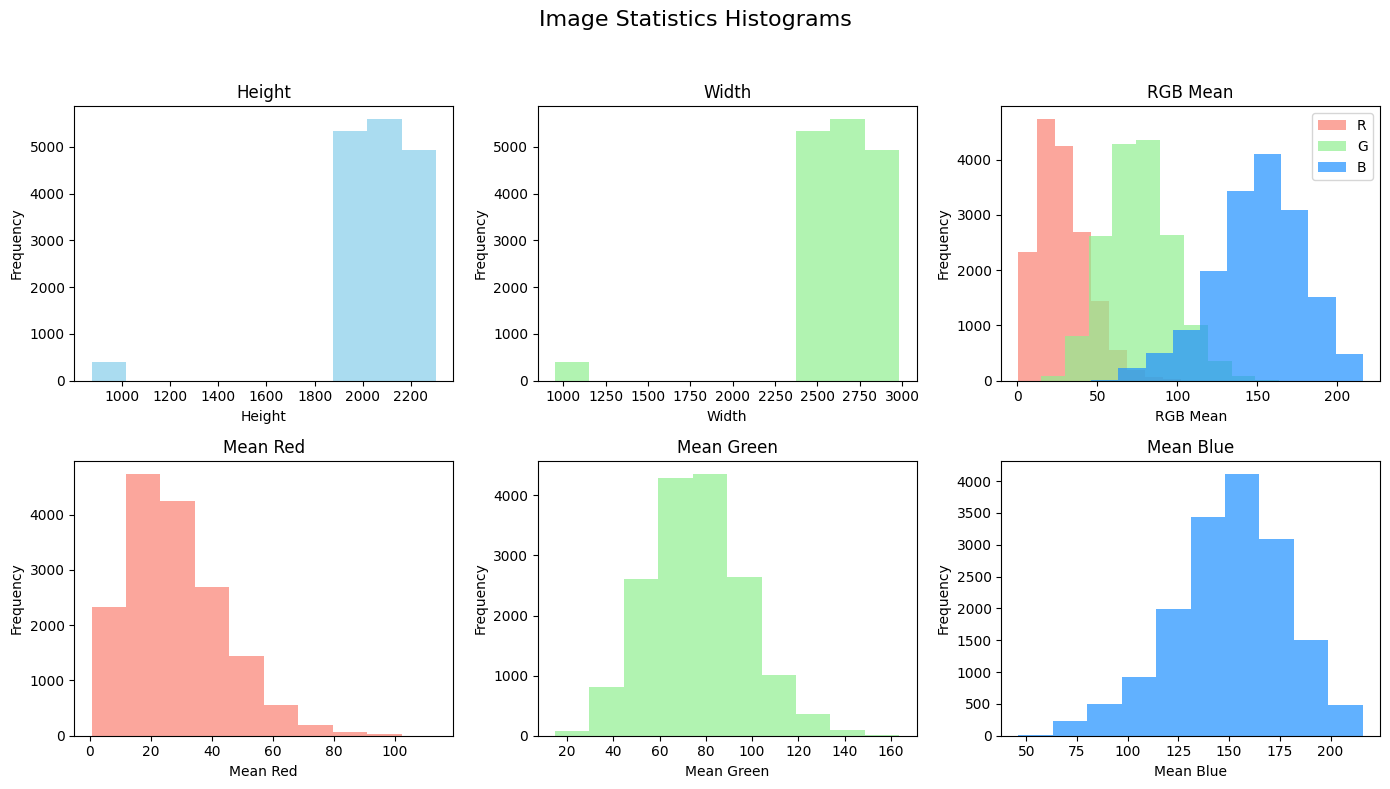

In [ ]:
plot_image_statistics(image_stats_df)

In [ ]:
# Define the path to the image folder
image_folder = 'data/images/'

calculate_normalization_values(image_folder)

Mean values (R, G, B): [0.5896205017400412, 0.29888971649817453, 0.1107679405196557]
Standard deviation (R, G, B): [0.28544273712830986, 0.15905456049750208, 0.07012281660980953]


### Overall Profiling

In [ ]:
table_name = 'Report BRSET'
out_dir = 'Profile'

# Data profiling:
# You can alsoset minimal=True for a summary:
profile = ProfileReport(df, title=f'{table_name}')

profile.to_notebook_iframe()

# save the profile:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

profile.to_file(f'{out_dir}/{table_name}.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]